In [129]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [130]:
Archivo = pd.read_csv('C:\\Users\\hecto\\OneDrive - Universidad Nacional Abierta y a Distancia\\2024-1\\ANÁLISIS DE DATOS\\TAREA 3\\Anexo 3 - Dataset Heart Disease Cleveland UCI\\heart_cleveland_upload.csv', encoding='latin1')

In [131]:
#  1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
# Inspeccion de datos

print(Archivo.columns)

Index(['edad', 'sexo', 'tipo_dolor', 'presion_arterial', 'colesterol',
       'azucar_sangre', 'electrocardio', 'frecuencia_cardiaca', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'condision'],
      dtype='object')


In [133]:
Archivo.head(5)

,edad,sexo,tipo_dolor,presion_arterial,colesterol,azucar_sangre,electrocardio,frecuencia_cardiaca,exang,oldpeak,slope,ca,thal,condision
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [134]:
Archivo.describe()

,edad,sexo,tipo_dolor,presion_arterial,colesterol,azucar_sangre,electrocardio,frecuencia_cardiaca,exang,oldpeak,slope,ca,thal,condision
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [135]:
Archivo.shape

(297, 14)

In [136]:
Archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 297 non-null    int64  
 1   sexo                 297 non-null    int64  
 2   tipo_dolor           297 non-null    int64  
 3   presion_arterial     297 non-null    int64  
 4   colesterol           297 non-null    int64  
 5   azucar_sangre        297 non-null    int64  
 6   electrocardio        297 non-null    int64  
 7   frecuencia_cardiaca  297 non-null    int64  
 8   exang                297 non-null    int64  
 9   oldpeak              297 non-null    float64
 10  slope                297 non-null    int64  
 11  ca                   297 non-null    int64  
 12  thal                 297 non-null    int64  
 13  condision            297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [137]:
# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
# Limpieza de datos
Archivo.isnull().sum()*100/Archivo.shape[0]

edad                   0.0
sexo                   0.0
tipo_dolor             0.0
presion_arterial       0.0
colesterol             0.0
azucar_sangre          0.0
electrocardio          0.0
frecuencia_cardiaca    0.0
exang                  0.0
oldpeak                0.0
slope                  0.0
ca                     0.0
thal                   0.0
condision              0.0
dtype: float64

In [138]:
#   2. Preprocesar los datos limpiándolos, tratando valores faltantes ytransformándolos según sea necesario.
print("Registros faltantes de electrocardio: ",Archivo['electrocardio'].isin([0]).sum())


Registros faltantes de electrocardio:  147


In [139]:

Archivo['sexo']=Archivo['sexo'].replace(0,Archivo['sexo'].mean())


In [140]:
print("Registros faltantes de Sexo: ",Archivo['sexo'].isin([0]).sum())


Registros faltantes de Sexo:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

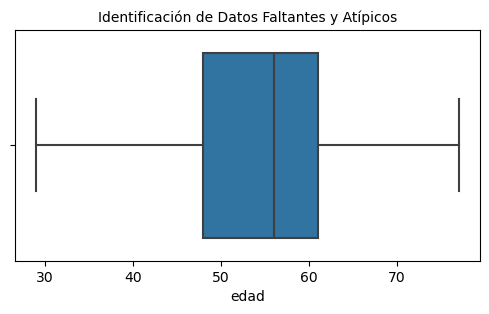

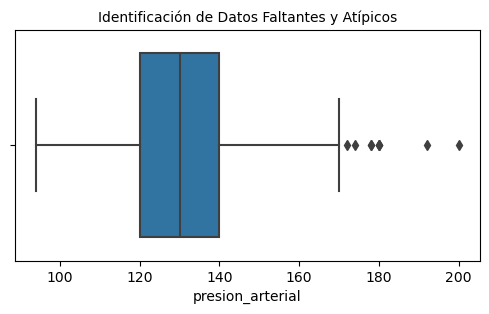

In [141]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['edad'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo['presion_arterial'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [142]:
nivel_minimo=100
nivel_maximo=170
Total_Atipicos=((Archivo['presion_arterial']<nivel_minimo)|(Archivo['presion_arterial']>nivel_maximo)).sum()
print("El total de datos atípicos es: {}".format(Total_Atipicos))

El total de datos atípicos es: 11


In [143]:
Archivo=Archivo[(Archivo['presion_arterial']<nivel_maximo)&(Archivo['presion_arterial']>nivel_minimo)]

In [144]:
Total_Atipicos=((Archivo['presion_arterial']<nivel_minimo)|(Archivo['presion_arterial']>nivel_maximo)).sum()
print("El total de datos atípicos es: {}".format(Total_Atipicos))

El total de datos atípicos es: 0


In [145]:
# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
Archivo['condision'].value_counts()

condision
0    152
1    126
Name: count, dtype: int64

In [147]:
Archivo[['condision']].head(10)


,condision
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


In [148]:
#  4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento
X = Archivo.drop('condision',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Archivo['condision'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [149]:
print (X_train)

     edad      sexo  tipo_dolor  presion_arterial  colesterol  azucar_sangre  \
150    39  0.676768           2               138         220              0   
91     62  0.676768           2               130         263              0   
193    61  0.676768           3               145         307              0   
292    40  1.000000           3               152         223              0   
84     65  0.676768           2               155         269              0   
..    ...       ...         ...               ...         ...            ...   
90     62  1.000000           2               130         231              0   
59     44  1.000000           1               120         263              0   
148    41  1.000000           2               112         250              0   
7      61  1.000000           0               134         234              0   
175    64  1.000000           3               145         212              0   

     electrocardio  frecuencia_cardiaca

In [150]:
print (Y_train)

150    0
91     1
193    1
292    1
84     0
      ..
90     0
59     0
148    0
7      1
175    1
Name: condision, Length: 208, dtype: int64


In [151]:
#  5. Entrenar el modelo configurando los diferentes hiperparámetros
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [152]:
print (Y_test)

138    0
249    0
191    0
216    1
101    0
      ..
192    1
288    1
208    1
37     0
79     0
Name: condision, Length: 70, dtype: int64


In [153]:
print (Prediccion)

[0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1]


In [154]:
#   6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.90      0.81      0.85        32

    accuracy                           0.87        70
   macro avg       0.88      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



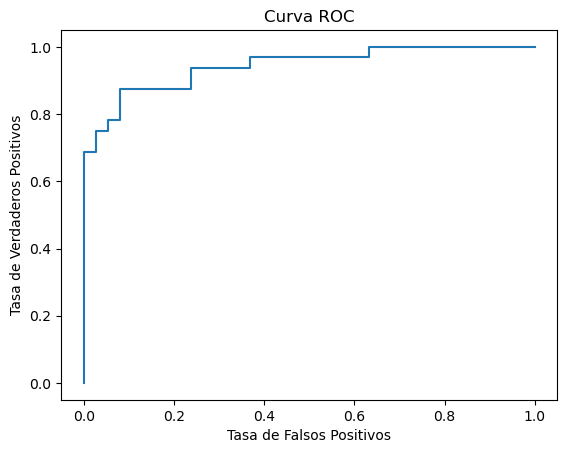

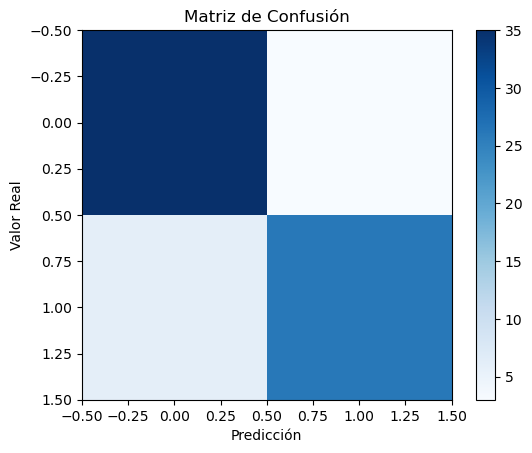

In [160]:
#   7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
#Matrix de Confusión del modelo
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Calcular las probabilidades de predicción para las muestras de prueba
y_pred_proba = modelo_regresion.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, modelo_regresion.predict(X_test))

# Graficar la matriz de confusión
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
